In [1]:
# This is an example of the comparison of images using the HOG technique
#
# Prepared by Juan D. Soler (soler@mpia.de)

import sys
sys.path.append('../pyastrohog/')
from astrohog2d import *

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
# Load two test images
image1 = scipy.ndimage.imread('../data/image.001.png', flatten=True)
image2 = scipy.ndimage.imread('../data/image.002.png', flatten=True)

In [3]:
# Calculate the relative orientation angles using the tools in the astroHOG package
circstats, corrframe, smoothframe1, smoothframe2 = HOGcorr_frame(image1, image2, ksz=3.)

In [4]:
# Print the correlation statistics
print('Mean resultant vector (r)        ', circstats[0])
print('Rayleigh statistic (Z)           ', circstats[1])
print('Projected Rayleigh statistic (V) ', circstats[2])
print('Rayleigh statistic (ii)          ', circstats[5], '+/-', circstats[6])
print('Mean angle                       ', circstats[7])
print('Alignment measure (AM)           ', circstats[8])

Mean resultant vector (r)         0.113194
Rayleigh statistic (Z)            1119.61371216
Projected Rayleigh statistic (V)  9866.29517639
Rayleigh statistic (ii)           141.605805869 +/- 0.941016518805
Mean angle                        0.0353966333594
Alignment measure (AM)            0.35364


In [5]:
# Computing the histogram of relative orientations
hist, bin_edges = np.histogram(corrframe*180.0/np.pi, density=True, range=[-90.,90.], bins=40)
bin_center=0.5*(bin_edges[0:np.size(bin_edges)-1]+bin_edges[1:np.size(bin_edges)])

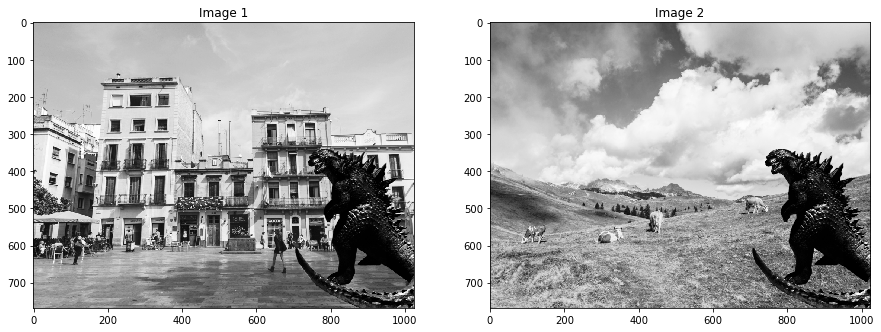

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15., 10.))
ax[0].imshow(image1, cmap='Greys_r')
ax[0].set_title('Image 1')
ax[1].imshow(image2, cmap='Greys_r')
ax[1].set_title('Image 2')
plt.show()

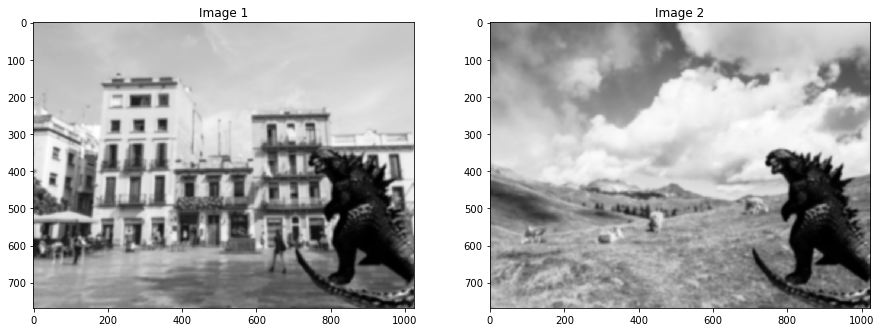

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15., 10.))
ax[0].imshow(smoothframe1, cmap='Greys_r')
ax[0].set_title('Image 1')
ax[1].imshow(smoothframe2, cmap='Greys_r')
ax[1].set_title('Image 2')
plt.show()

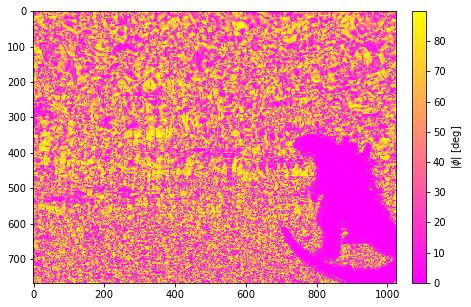

In [8]:
fig, ax = plt.subplots(1,1, figsize=(7.5, 5.))
im=plt.imshow(np.abs(corrframe)*180.0/np.pi, cmap='spring')
cb1=plt.colorbar(im,fraction=0.046, pad=0.04)
cb1.set_label(r'$|\phi|$ [deg]')
plt.show()

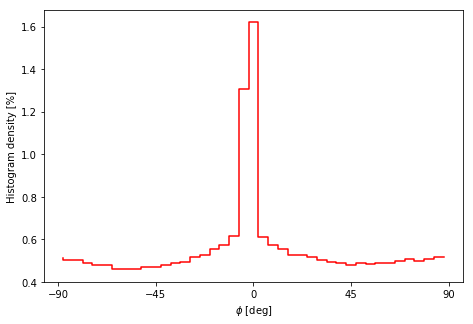

In [9]:
# Show the histogram of relative orientations
fig, ax = plt.subplots(1,1, figsize=(7.5, 5.))
ax.step(bin_center, hist*100, color='red')
ax.set_ylabel('Histogram density [%]')
ax.set_xlabel(r'$\phi$ [deg]')
ax.set_xticks([-90.,-45.,0.,45.,90.])
plt.show()